In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Preprocessing

In [73]:
df = pd.read_csv('JEE_Dropout_After_Class_12.csv')
df

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.7,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.7,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,NaN,6.3,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.0,High,Upto 10th,Urban,Low,No,Yes,0


In [74]:
df[df.dropout == 1]

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
13,45.21,62.20,62.41,ICSE,85.09,2,Allen,7.3,Low,Graduate,Urban,Medium,Yes,No,1
14,47.85,67.23,77.88,State,86.03,2,Local,3.1,Low,12th,Rural,Medium,Yes,No,1
21,68.84,54.24,75.25,ICSE,69.38,1,Local,6.5,Low,PG,Urban,High,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,87.67,65.84,100.00,CBSE,74.49,1,FIITJEE,1.9,Low,Upto 10th,Semi-Urban,Medium,No,No,1
4978,77.45,49.80,54.74,ICSE,70.43,1,FIITJEE,1.1,High,12th,Urban,High,No,Yes,1
4985,94.90,59.72,68.12,State,74.51,2,Allen,0.0,Mid,Upto 10th,Rural,High,Yes,No,1
4988,74.70,50.30,78.22,ICSE,88.40,2,FIITJEE,4.2,Low,12th,Rural,Medium,No,No,1


In [75]:
df.school_board.unique()

array(['CBSE', 'State', 'ICSE'], dtype=object)

In [76]:
df.drop(columns=['coaching_institute','family_income','parent_education','location_type','school_board'],inplace=True)
df

,jee_main_score,jee_advanced_score,mock_test_score_avg,class_12_percent,attempt_count,daily_study_hours,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,70.09,1,5.4,Low,No,No,1
1,70.06,58.75,64.33,78.00,1,5.5,Low,Yes,No,0
2,81.07,37.27,60.83,64.36,1,7.0,Medium,Yes,No,1
3,93.32,60.72,69.33,73.21,1,2.1,Medium,Yes,Yes,0
4,68.72,77.73,82.37,89.02,1,6.3,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...
4995,71.31,86.82,57.08,84.45,1,4.7,High,Yes,Yes,0
4996,81.96,34.03,82.85,73.02,2,4.7,High,Yes,Yes,0
4997,100.00,54.71,83.75,77.87,2,6.3,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,62.25,1,4.0,Low,No,Yes,0


In [77]:
df[['peer_pressure_level', 'mental_health_issues', 'admission_taken']] = df[['peer_pressure_level', 'mental_health_issues', 'admission_taken']].replace({
    'High': 1,
    'Yes': 1,
    'Medium': 0,
    'No': 0,
    'Low': -1
})


/tmp/ipykernel_6138/2026843652.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['peer_pressure_level', 'mental_health_issues', 'admission_taken']] = df[['peer_pressure_level', 'mental_health_issues', 'admission_taken']].replace({


Heat map

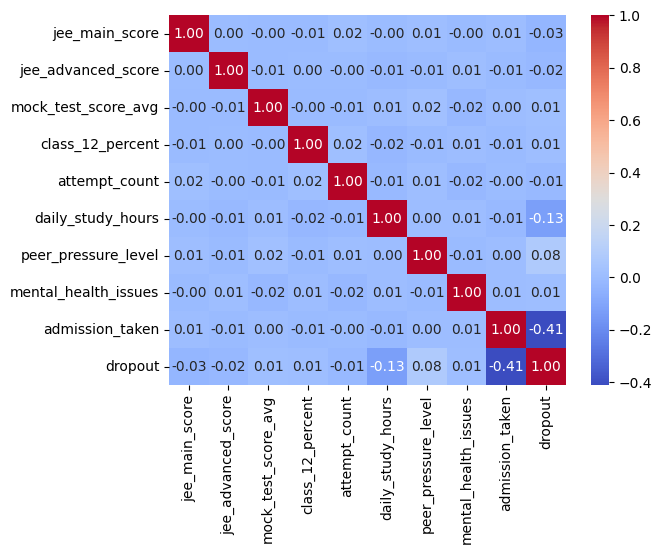

In [78]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Model Train

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train , y_test = train_test_split(df[['jee_main_score','jee_advanced_score','daily_study_hours','peer_pressure_level','admission_taken']],df.dropout,train_size=0.9)

In [87]:
model.fit(x_train,y_train)

LogisticRegression()

In [88]:
model.score(x_test,y_test)

0.792

In [ ]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[373,  10],
       [ 94,  23]])

## Prediction

Text(95.72222222222221, 0.5, 'Truth')

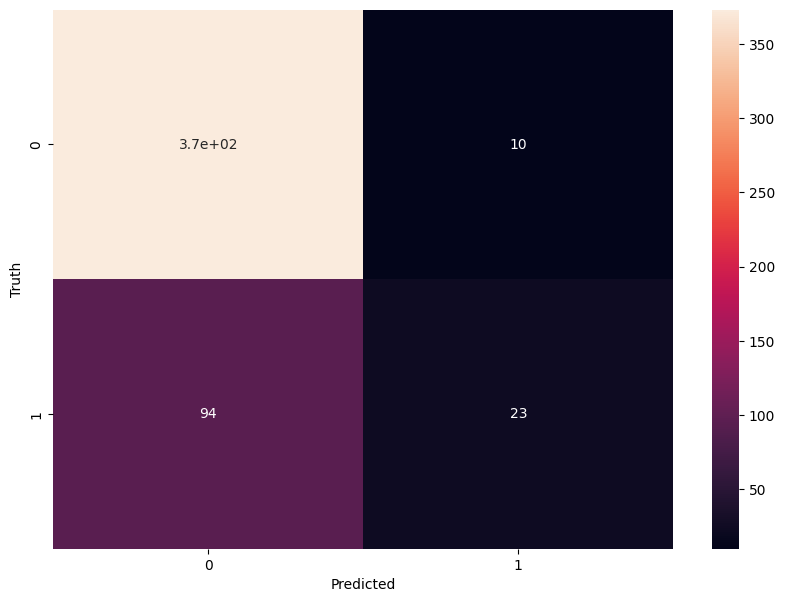

In [90]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')